# Лабораторная работа №3 "Предобработка данных"
# Вариант №12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных
### 1. Загрузите данные

In [2]:
planets = pd.read_csv("data/planets.csv", sep=";")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Описательная статистика
### 2. Описание данных 

In [3]:
print(f"Число записей: {planets.shape[0]}")
print(f"Число полей: {planets.shape[1]}")

Число записей: 1035
Число полей: 6


### 3. Описание полей

* поле - тип поля
* method - категориальный
* number - порядковый
* orbital_period - числовой
* mass - числовой
* distance - числовой
* year - порядковый

In [4]:
print("Число имеющихся значений Non-Null Count: \n")
planets.info()

Число имеющихся значений Non-Null Count: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
print("Число уникальных значений: \n")
planets.nunique()

Число уникальных значений: 



method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

In [6]:
print("Число отсутствующих значений: \n")
planets.isnull().sum()

Число отсутствующих значений: 



method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

### 4. Мин, макс, медиана, среднеквадратическое отклонение

In [7]:
planets.loc[:,["orbital_period", "mass", "distance"]].describe()

,orbital_period,mass,distance
count,992.000000,513.000000,808.000000
mean,2002.917596,2.638161,264.069282
std,26014.728304,3.818617,733.116493
min,0.090706,0.003600,1.350000
25%,5.442540,0.229000,32.560000
50%,39.979500,1.260000,55.250000
75%,526.005000,3.040000,178.500000
max,730000.000000,25.000000,8500.000000


### 5. Статистики по категориям

In [8]:
planets.groupby('method').agg(
    count=('method', 'size'),  # количество планет
    orbital_period=('orbital_period', 'mean'), # средний период обращения
    mass=('mass', 'mean'), # средняя масса
    distance=('distance', 'mean') # среднее расстрояние
).reset_index()

,method,count,orbital_period,mass,distance
0,Astrometry,2,631.180000,NaN,17.875000
1,Eclipse Timing Variations,9,4751.644444,5.125000,315.360000
2,Imaging,38,118247.737500,NaN,67.715937
3,Microlensing,23,3153.571429,NaN,4144.000000
4,Orbital Brightness Modulation,3,0.709307,NaN,1180.000000
5,Pulsar Timing,5,7343.021201,NaN,1200.000000
6,Pulsation Timing Variations,1,1170.000000,NaN,NaN
7,Radial Velocity,553,823.354680,2.630699,51.600208
8,Transit,397,21.102073,1.470000,599.298080
9,Transit Timing Variations,4,79.783500,NaN,1104.333333


### 6. Пропуски данных

In [9]:
print(f"Число записей с пропусками: {planets.isnull().any(axis=1).sum()}")
print(f"Общее число пропусков: {planets.isnull().sum().sum()}")

Число записей с пропусками: 537
Общее число пропусков: 792


### 7. Ещё пропуски

In [10]:
_ = planets.isnull().sum(axis=1).value_counts().reset_index()
_.columns = ['Количество пропусков в записи', 'Число таких записей']
_

,Количество пропусков в записи,Число таких записей
0,0,498
1,1,293
2,2,233
3,3,11


### 8. Среднее количество пропусков для планет по годам

In [11]:
_ = planets.loc[:, "year"].reset_index() # Копия датасета с колонкой год
_["nulls"] = planets.isnull().sum(axis=1) # Считаем пропуски по каждой планете
_.groupby("year").agg(
    null_mean=('nulls', 'mean')
    )

,null_mean
year,
1989,0.000000
1992,2.000000
1994,2.000000
1995,0.000000
1996,0.333333
1997,0.000000
1998,0.000000
1999,0.066667
2000,0.125000


### 9. Среднее количество пропусков для планет по категориям

In [12]:
_ = planets.loc[:, "method"].reset_index() # Копия датасета с колонкой метод обнаружения (категория)
_["nulls"] = planets.isnull().sum(axis=1) # Считаем пропуски по каждой планете
_.groupby("method").agg(
    null_mean=('nulls', 'mean')
    )

,null_mean
method,
Astrometry,1.000000
Eclipse Timing Variations,1.333333
Imaging,1.842105
Microlensing,2.260870
Orbital Brightness Modulation,1.333333
Pulsar Timing,1.800000
Pulsation Timing Variations,2.000000
Radial Velocity,0.119349
Transit,1.433249


## Очистка датасета
### 10. Удаляем записи где больше 2 пропусков

In [13]:
nulls = planets.isnull().sum(axis=1) # Считаем нколичество пропусков
filtered_planets = planets[nulls <= 2] # Фильтруем
filtered_planets.head() # Вывод

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### 11. Замена пропусков

Напомню, что у меня 12 вариант, значит выполняю замену по правилу 12 mod 6 = 0  
Заменяем 0 – на среднее значение признака по всему набору

In [14]:
# находим средние по всему набору
mean_orbital_period = filtered_planets.dropna(
    subset=['orbital_period']
    )['orbital_period'].mean()
mean_mass = filtered_planets.dropna(
    subset=['mass']
    )['mass'].mean()
mean_distance = filtered_planets.dropna(
    subset=['distance']
    )['distance'].mean()

print(f"Среднее по периоду: {mean_orbital_period:.02f}")
print(f"Среднее по массе: {mean_mass:.02f}")
print(f"Среднее по расстоянию: {mean_distance:.02f}")

Среднее по периоду: 2002.92
Среднее по массе: 2.64
Среднее по расстоянию: 264.07


Заменяем значения

In [15]:
non_null_planets = filtered_planets.copy()
non_null_planets["orbital_period"] = non_null_planets["orbital_period"].fillna(mean_orbital_period)
non_null_planets["mass"] = non_null_planets["mass"].fillna(mean_mass)
non_null_planets["distance"] = non_null_planets["distance"].fillna(mean_distance)
non_null_planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### 12. Добавляем код планеты

In [16]:
# сначала отделим планетные системы
non_null_planets["planet_systems"] = [-1]*non_null_planets.shape[0]
last_number = -1
last_distance = -1
last_planet_systems = -1
for i, row in non_null_planets.iterrows():
    if row.number != 1 and \
        row.number == last_number and \
            round(row.distance) == round(last_distance):
        # Одна планетная система
        non_null_planets.loc[i, "planet_systems"] = last_planet_systems
    else:
        # Новая планетная система
        non_null_planets.loc[i, "planet_systems"] = last_planet_systems + 1
    
        
    last_number = non_null_planets.loc[i, "number"]
    last_distance = non_null_planets.loc[i, "distance"]
    last_planet_systems = non_null_planets.loc[i, "planet_systems"]

non_null_planets.head()

,method,number,orbital_period,mass,distance,year,planet_systems
0,Radial Velocity,1,269.300,7.10,77.40,2006,0
1,Radial Velocity,1,874.774,2.21,56.95,2008,1
2,Radial Velocity,1,763.000,2.60,19.84,2011,2
3,Radial Velocity,1,326.030,19.40,110.62,2007,3
4,Radial Velocity,1,516.220,10.50,119.47,2009,4


In [17]:
# Сортируем
sorted_planets = non_null_planets.sort_values(by=["planet_systems", "orbital_period"],  ascending=[True, True])
sorted_planets[sorted_planets["planet_systems"] == 102].reset_index(inplace=True)

# Дальше присваиваем код
sorted_planets["code"] = ["X0"]*sorted_planets.shape[0]
last_planet_systems = -1
last_code = 65
for i, row in sorted_planets.iterrows():
    if row.planet_systems == last_planet_systems:
        # Одна планетная система, повышаем букву алфавита
        sorted_planets.loc[i, "code"] = f"{chr(last_code+1)}{row.planet_systems}"
        last_code += 1
    else:
        # Новая планетная система, начинаем с буквы А
        last_code = 65
        sorted_planets.loc[i, "code"] = f"{chr(last_code)}{row.planet_systems}"
    last_planet_systems = row.planet_systems

df = sorted_planets.copy()
# пример кодов
df.loc[sorted_planets["planet_systems"] == 102,] 

,method,number,orbital_period,mass,distance,year,planet_systems,code
130,Radial Velocity,6,7.2004,0.018,6.8,2011,102,A102
131,Radial Velocity,6,28.1400,0.012,6.8,2011,102,B102
134,Radial Velocity,6,39.0260,0.008,6.8,2013,102,C102
133,Radial Velocity,6,62.2400,0.008,6.8,2013,102,D102
132,Radial Velocity,6,91.6100,0.016,6.8,2013,102,E102
135,Radial Velocity,6,256.2000,0.014,6.8,2013,102,F102


## Визуализация данных

### 13. Строим гистограммы

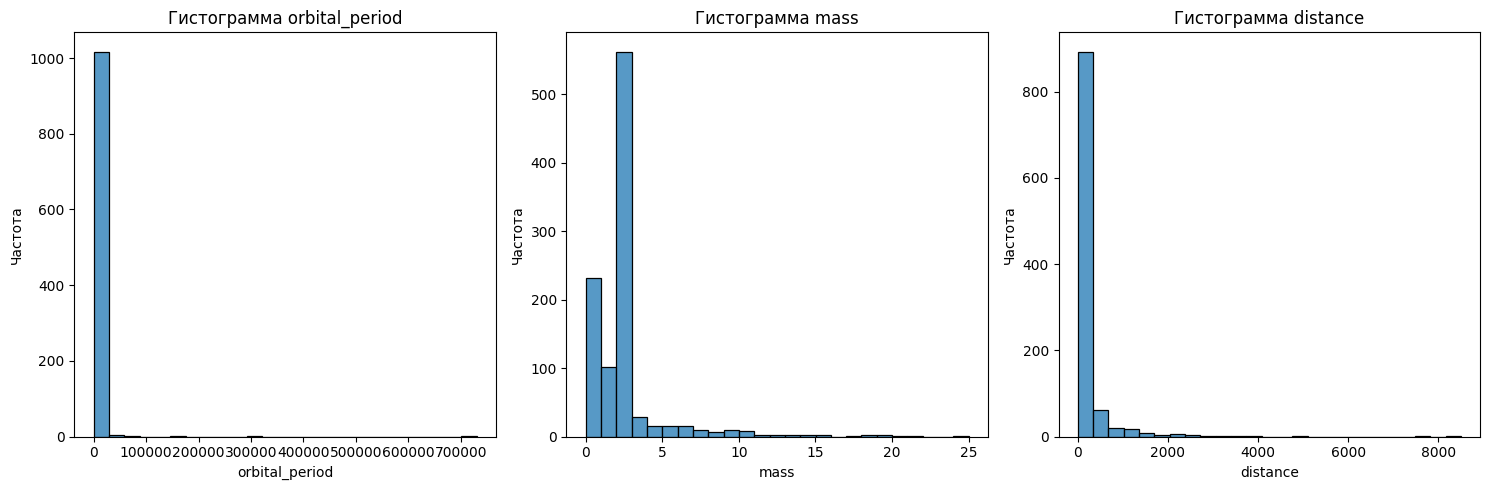

In [32]:
numeric_features = ["orbital_period", "mass", "distance"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=25, kde=False)
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Видно, что некоторые значения выделяются, видимо, из-за замены пропусков. Давайте посмотрим на гистограммы датасета до замены

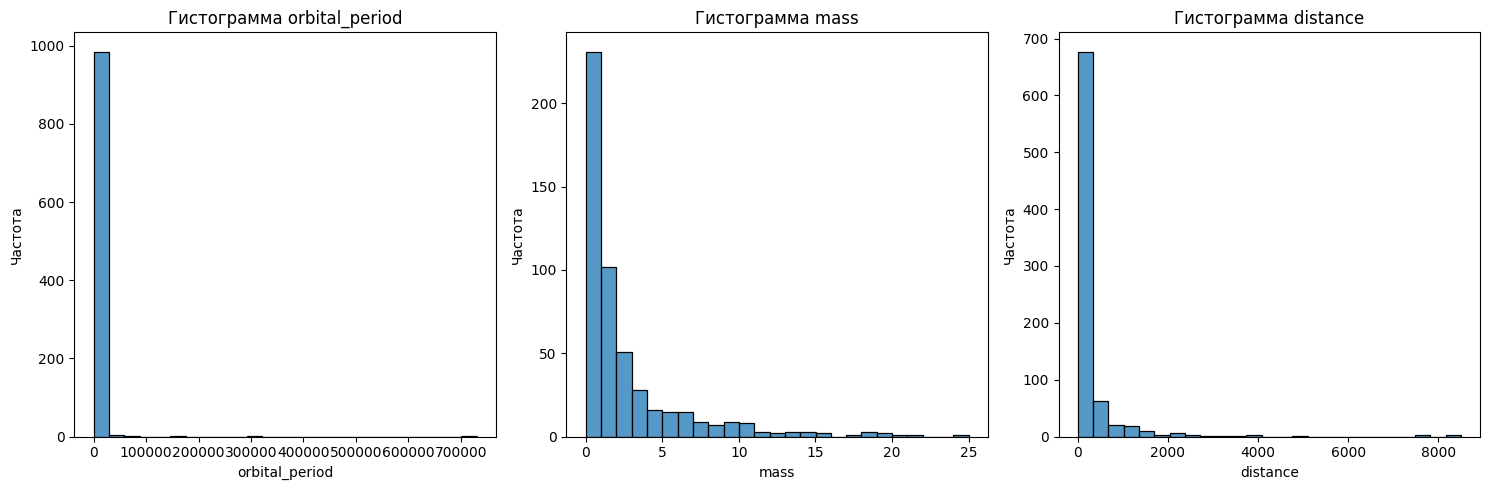

In [33]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(planets[feature], bins=25, kde=False)
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Судя по гистограмме mass можно предположить, что распределение признака mass похоже на логнормальное. Во всех трёх признаказ есть явно доминирующий первый диапазон.

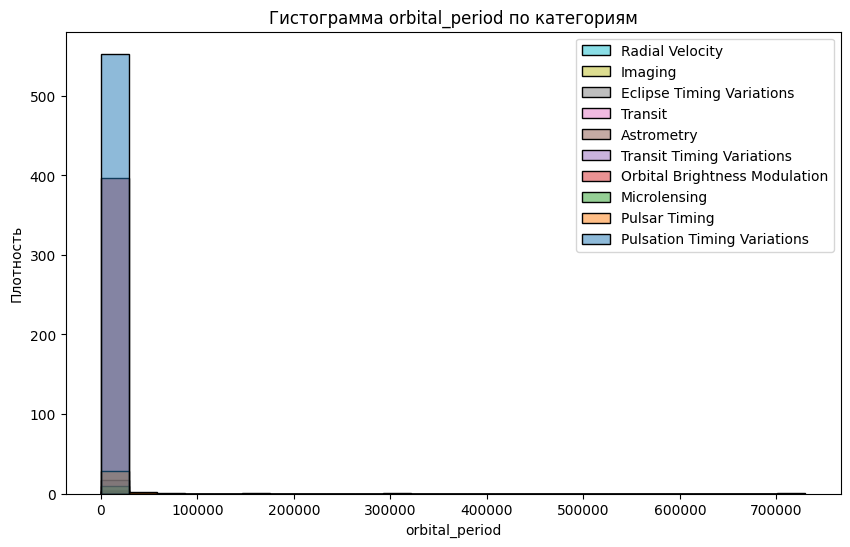

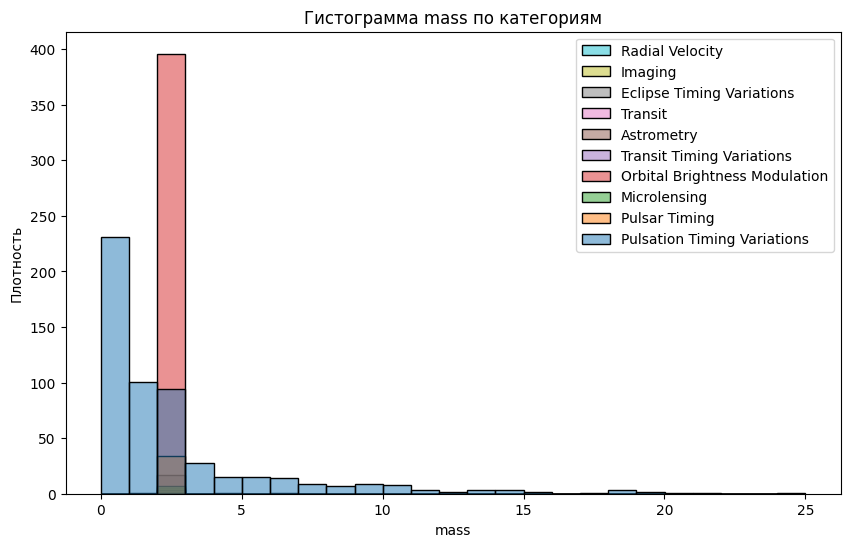

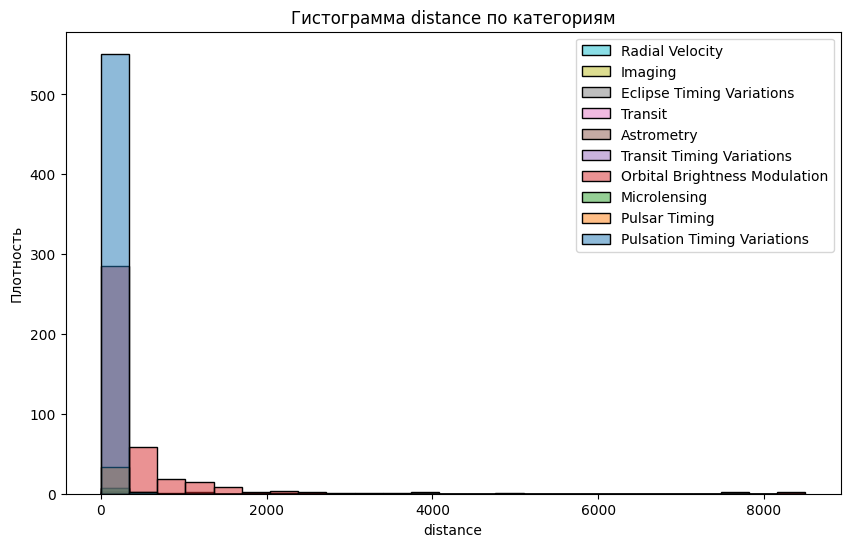

In [40]:
# Строим гистограммы по категориям
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='method', bins=25)
    plt.title(f'Гистограмма {feature} по категориям')
    plt.xlabel(feature)
    plt.ylabel('Плотность')
    plt.legend(df["method"].unique())
    plt.show()

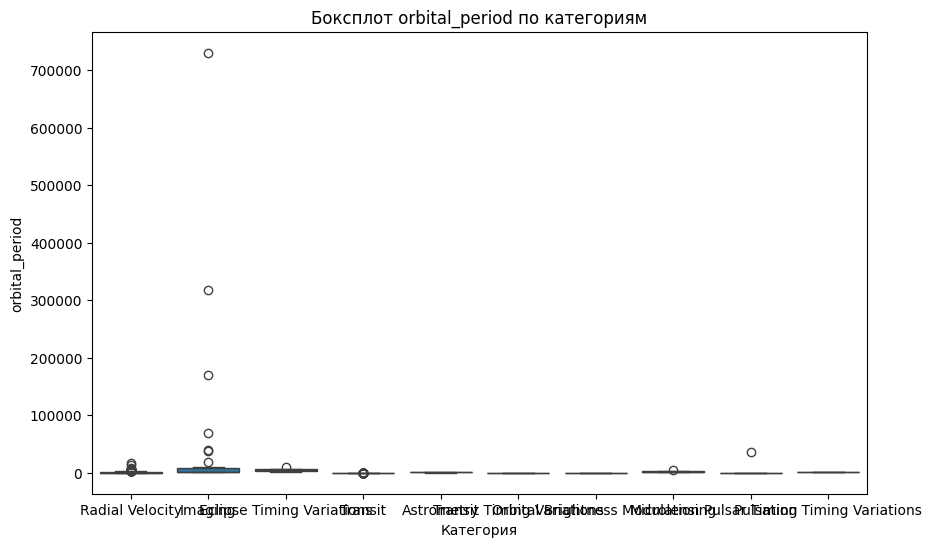

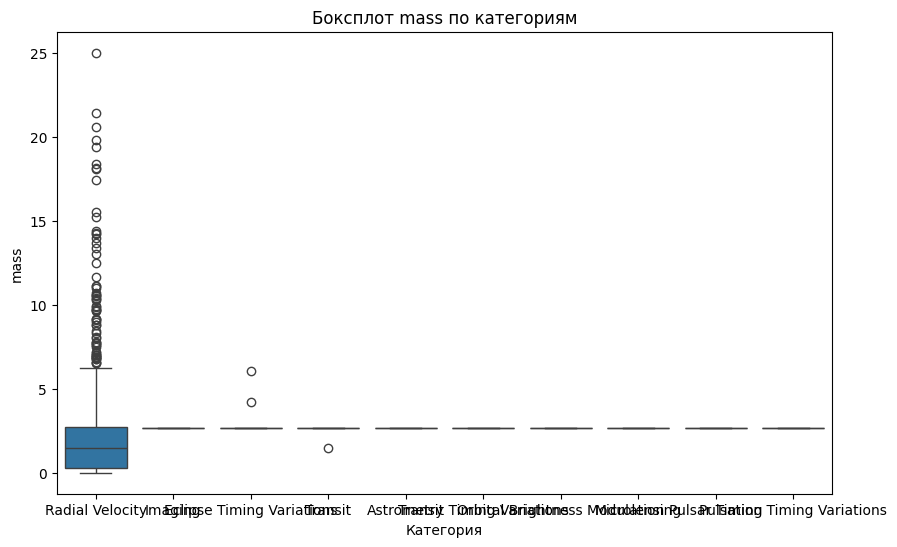

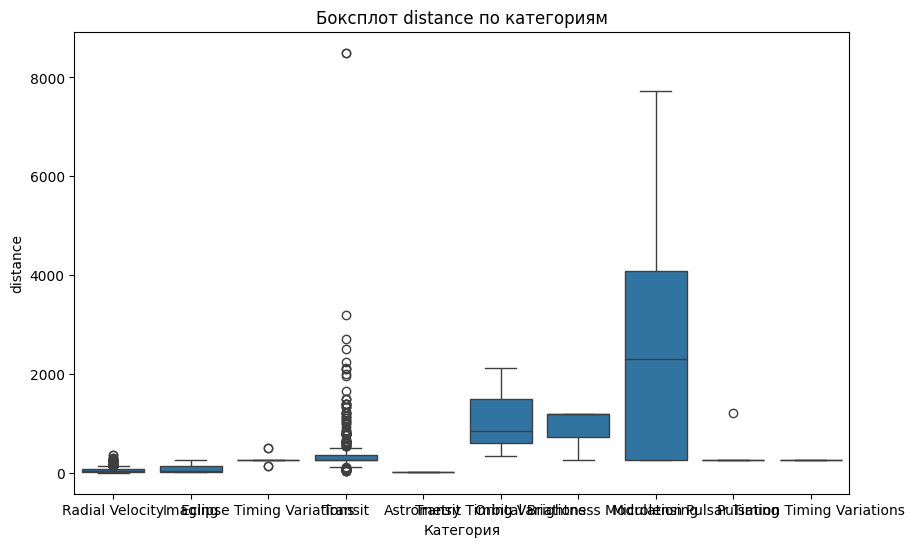

In [42]:
# Строим боксплоты по категориям
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='method', y=feature, data=df)
    plt.title(f'Боксплот {feature} по категориям')
    plt.xlabel('Категория')
    plt.ylabel(feature)
    plt.show()